In [35]:
import numpy as np
from collections import defaultdict

class Agent:

    def __init__(self, nA, control='Sarsa', alpha=0.25, gamma=1, epsilon=0.001):
        """ Initialize agent.

        Params
        ======
        - nA: number of actions available to the agent
        - control: control algorithm: Sarsa, Sarsamax, or Expected-Sarsa
        - alpha: alpha value
        - gamma: gamma value
        - epsilon: epsilon value
        """
        self.nA = nA
        self.control = control
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = defaultdict(lambda: np.zeros(self.nA))
        
    def __get_probs(self, state):
        epsilon = self.epsilon if state in self.Q else 1
        probs = np.ones(self.nA) * epsilon / self.nA
        best_a = np.argmax(self.Q[state])
        probs[best_a] = 1 - epsilon + epsilon / self.nA
        return probs

    def __sarsa(self, state, action, next_state):
        next_action = self.select_action(state)
        return self.Q[next_state][next_action]

    def __sarsa_max(self, state, action, next_state):
        next_action = np.argmax(self.Q[state])
        return self.Q[next_state][next_action]
        
    def __exp_sarsa(self, state, action, next_state):
        probs = self.__get_probs(state)
        expected_sarsa = 0
        for next_action in range(self.nA):
            expected_sarsa += probs[next_action] * self.Q[next_state][next_action]
        return expected_sarsa
    
    def __udpate_epsilon(self, i_episode):
        #self.epsilon = 1 /((i_episode/8000)+1)
        self.epsilon = 1 / i_episode
    
    def select_action(self, state):
        """ Given the state, select an action.

        Params
        ======
        - state: the current state of the environment
        
        Returns
        =======
        - action: an integer, compatible with the task's action space
        """
        return np.random.choice(np.arange(self.nA), p=self.__get_probs(state))
      
    def step(self, state, action, reward, next_state, done, i_episode):
        """ Update the agent's knowledge, using the most recently sampled tuple.

        Params
        ======
        - state: the previous state of the environment
        - action: the agent's previous choice of action
        - reward: last reward received
        - next_state: the current state of the environment
        - done: whether the episode is complete (True or False)
        - i_episode: number of episode
        """
        # update epsilon
        self.__udpate_epsilon(i_episode)
        
        update_val = 0
        if self.control == 'Sarsa':
            update_val = self.__sarsa(state, action, next_state)
        elif self.control == 'Sarsamax':
            update_val = self.__sarsa_max(state, action, next_state)
        elif self.control == 'Expected-Sarsa':
            update_val = self.__exp_sarsa(state, action, next_state)
        
        old_val = self.Q[state][action]
        self.Q[state][action] = old_val + self.alpha * (reward + self.gamma * update_val - old_val)

In [36]:
from monitor import interact
import gym
import numpy as np

env = gym.make('Taxi-v2')
nA = env.action_space.n
num_episodes = 20000
window = 100

In [31]:
sarsa_agent = Agent(nA, 'Sarsa')
sarsa_avg_rewards, sarsa_best_avg_reward = interact(env, sarsa_agent, num_episodes, window)

Episode 20000/20000 || Best average reward 9.426



In [32]:
sarsa_max_agent = Agent(nA, 'Sarsamax')
sarsa_max_avg_rewards, sarsa_max_best_avg_reward = interact(env, sarsa_max_agent, num_episodes, window)

Episode 20000/20000 || Best average reward 9.392



In [37]:
exp_sarsa_agent = Agent(nA, 'Expected-Sarsa')
exp_sarsa_rewards, exp_sarsa_avg_reward = interact(env, exp_sarsa_agent, num_episodes, window)

Episode 20000/20000 || Best average reward 9.247



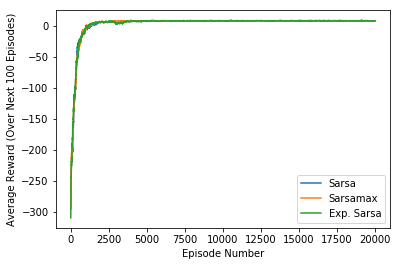

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, num_episodes, len(sarsa_avg_rewards), endpoint=False)
plt.plot(x, np.asarray(sarsa_avg_rewards))
plt.plot(x, np.asarray(sarsa_max_avg_rewards))
plt.plot(x, np.asarray(exp_sarsa_rewards))

plt.xlabel('Episode Number')
plt.ylabel('Average Reward (Over Next %d Episodes)' % window)
plt.legend(['Sarsa', 'Sarsamax', 'Exp. Sarsa'], loc='lower right')

plt.show()